In [1]:
from loader import Loader

In [2]:
tds = Loader.load_imgs("train")

In [3]:
tds.shape

(200000, 64, 64, 3)

In [4]:
vds = Loader.load_imgs("val")

In [5]:
vds.shape

(10000, 64, 64, 3)

In [6]:
from factory import ModelFactory

In [11]:
enc_dec = ModelFactory.get_enc_dec()

In [12]:
from helper import Helper

In [ ]:
Helper.train_enc_dec(enc_dec, (tds, tds), (vds, vds),
                     64, 100, 0.001, 0.0)

Train on 200000 samples, validate on 10000 samples
Epoch 1/100
199872/200000 [============================>.] - ETA: 0s - loss: 1.9375
Epoch 00001: val_loss improved from inf to 1.50011, saving model to Model/tmp_enc_dec.h5
200000/200000 [==============================] - 95s 475us/sample - loss: 1.9372 - val_loss: 1.5001
Epoch 2/100
199872/200000 [============================>.] - ETA: 0s - loss: 1.4413
Epoch 00002: val_loss improved from 1.50011 to 1.37751, saving model to Model/tmp_enc_dec.h5
200000/200000 [==============================] - 95s 473us/sample - loss: 1.4413 - val_loss: 1.3775
Epoch 3/100
199872/200000 [============================>.] - ETA: 0s - loss: 1.3639
Epoch 00003: val_loss improved from 1.37751 to 1.33505, saving model to Model/tmp_enc_dec.h5
200000/200000 [==============================] - 97s 485us/sample - loss: 1.3639 - val_loss: 1.3351
Epoch 4/100
199872/200000 [============================>.] - ETA: 0s - loss: 1.3255
Epoch 00004: val_loss improved from 1.

In [24]:
from data_utils import get_val_batch, get_test_batch
import numpy as np

In [25]:
test_batch = get_test_batch(0, 1)
test_imgs = np.asarray([test_batch[0, 0], test_batch[0, 1], test_batch[0, 6]])

In [41]:
test_predicted = enc_dec.predict(test_imgs)

In [42]:
train_imgs = np.asarray([tds[0], tds[10], tds[20]])

In [43]:
predicted = enc_dec.predict(train_imgs)

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_three(imgs, predicted):
    for i in range(3):
        plt.subplot(2, 3, i+1)
        plt.imshow(imgs[i])
        plt.subplot(2, 3, i+4)
        plt.imshow(predicted[i])

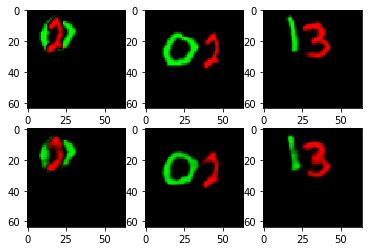

In [45]:
show_three(train_imgs, predicted)

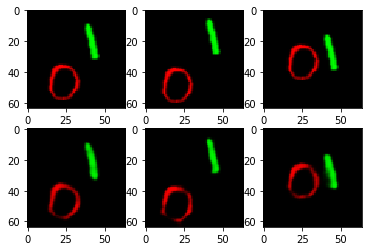

In [46]:
show_three(test_imgs, test_predicted)

In [47]:
from sklearn.metrics import mean_absolute_error

def check_mae(imgs, predicteds):
    maes = np.zeros(imgs.shape[0] * imgs.shape[3], dtype=np.float32)
    for i in range(imgs.shape[0]):
        for j in range(imgs.shape[3]):
            maes[i * 3 + j] = mean_absolute_error(imgs[i, :, :, j], predicteds[i, :, :, j])
    return np.average(maes[np.nonzero(maes)])

In [48]:
check_mae(train_imgs, predicted)

0.008200879

In [49]:
check_mae(test_imgs, test_predicted)

0.0073064514

In [50]:
Helper.save_enc_dec(enc_dec)

SAVE DONE! ENC_DEC 06161904


In [51]:
from convert import *

In [52]:
enc = Helper.load_enc("06161904")

In [53]:
dec = Helper.load_dec("06161904")

In [54]:
twostep_predicted = dec.predict(enc.predict(test_imgs))

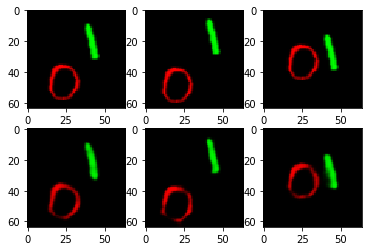

In [57]:
show_three(test_imgs, twostep_predicted)

In [58]:
img2vec(enc)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [1]:
from datapath import DataPath

In [3]:
len(DataPath.vec_paths("train"))

1000